## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Author : Pauline Wambui

# Identifying the business problem

1. Look at the best performing movies
2. The cost of production of the movies
3. The competition between different studios in that produce the movies
4. The changing in tastes of different movies
5. the competition between different genres

# Data cleaning process

In [241]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


# Data cleaning in the bom.movie_gross.csv

In [283]:
bom_movies = pd.read_csv("project dataset/bom.movie_gross.csv")
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [284]:
#to know the number of rows and columns
bom_movies.shape

(3387, 5)

In [285]:
#This is to detect the number of missing values
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [286]:
#This is to get the sum of missing values
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [287]:
#To get the number of duplicated values
bom_movies.duplicated().value_counts()

False    3387
dtype: int64

In [288]:
#Dropped the foreign_gross column since it has many missing values
bom_movies.drop('foreign_gross', axis = 1, inplace= True)
bom_movies

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [201]:
#replacing the number of studio missing values with the mode
bom_movies.isna().sum()

title              0
studio             5
domestic_gross    28
year               0
dtype: int64

In [202]:
#replaced number of domestic_gross values with the median
bom_movies['domestic_gross'].fillna(bom_movies['domestic_gross'].median(), inplace= True)

In [203]:
bom_movies.isna().sum()

title             0
studio            5
domestic_gross    0
year              0
dtype: int64

In [204]:
bom_movies['studio'].fillna('studio', inplace= True)
bom_movies

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [221]:
bom_movies = bom_movies[bom_movies['studio'].notna()]
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [207]:
bom_movies

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [208]:
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
dtype: int64

In [209]:
bom_movies['year']=pd.to_datetime(bom_movies['year'])
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3387 non-null   object        
 1   studio          3387 non-null   object        
 2   domestic_gross  3387 non-null   float64       
 3   year            3387 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 132.3+ KB


# Data cleaning in im.db

In [133]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('project dataset/im.db')

In [134]:
# 
im_df1 = pd.read_sql("""
select * from movie_ratings

""", conn)


In [135]:
im_df1

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [136]:
im_df1.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [137]:
im_df = pd.read_sql("""
select * from movie_basics

""", conn)


In [138]:
im_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [139]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [140]:
# summing the number of missing values
im_df.isna().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [141]:
# checking for any duplicated values
im_df.duplicated().sum()

0

In [154]:
#joining the 2 tables using movie_id
im_df = pd.read_sql("""
SELECT 
primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id;


""", conn)

In [155]:
im_df


,primary_title,start_year,genres,averagerating,numvotes
0,Sunghursh,2013,"Action,Crime,Drama",7.0,77
1,One Day Before the Rainy Season,2019,"Biography,Drama",7.2,43
2,The Other Side of the Wind,2018,Drama,6.9,4517
3,Sabse Bada Sukh,2018,"Comedy,Drama",6.1,13
4,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
73851,Diabolik sono io,2019,Documentary,6.2,6
73852,Sokagin Çocuklari,2019,"Drama,Family",8.7,136
73853,Albatross,2017,Documentary,8.5,8
73854,La vida sense la Sara Amat,2019,None,6.6,5


# Joining the two tables

In [164]:
im_db = pd.read_sql("""
                  SELECT primary_title, start_year, genres, averagerating, numvotes
                  FROM movie_basics AS MB
                  JOIN movie_ratings AS MR
                   ON MB.movie_id = MR.movie_id
                   WHERE numvotes > 1000000 AND averagerating BETWEEN 6.5 AND 9.0
                   ORDER BY numvotes DESC
                   limit 50;
                  """, conn)

In [159]:
im_db

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
5,The Wolf of Wall Street,2013,"Biography,Crime,Drama",8.2,1035358
6,Shutter Island,2010,"Mystery,Thriller",8.1,1005960


In [167]:
[im_db["genres"].value_counts()]

[Action,Adventure,Sci-Fi    2
 Mystery,Thriller           1
 Drama,Western              1
 Adventure,Drama,Sci-Fi     1
 Action,Thriller            1
 Biography,Crime,Drama      1
 Name: genres, dtype: int64]

In [173]:
null_values = im_df.isna().sum().sum()

if null_values == 0:
    print ('there are {} null values'. format(null_values))
else:
        print ('there are {} null values'. format(null_values))
def duplicate_values(item):
    duplicates = []
    for  x in item.duplicated():
        duplicates.append(x)
    if len(set(duplicates)) == 1:
        print('there are no duplicate rows')
    else: 
        print('there are {} duplicate rows'.format(item.duplicated.value_counts().sum()))
        
duplicate_values(im_db)

there are 804 null values
there are no duplicate rows


In [172]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   primary_title  73856 non-null  object 
 1   start_year     73856 non-null  int64  
 2   genres         73052 non-null  object 
 3   averagerating  73856 non-null  float64
 4   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


In [171]:
grouped = im_df.groupby('genres')
grouped.get_group("Action,Adventure,Sci-Fi")

,primary_title,start_year,genres,averagerating,numvotes
52,Jurassic World,2015,"Action,Adventure,Sci-Fi",7.0,539338
63,John Carter,2012,"Action,Adventure,Sci-Fi",6.6,241792
94,Alita: Battle Angel,2019,"Action,Adventure,Sci-Fi",7.5,88207
124,Captain America: The First Avenger,2011,"Action,Adventure,Sci-Fi",6.9,668137
217,Man of Steel,2013,"Action,Adventure,Sci-Fi",7.1,647288
...,...,...,...,...,...
69185,Atlantic Rim: Resurrection,2018,"Action,Adventure,Sci-Fi",1.7,597
70159,Alien Siege,2018,"Action,Adventure,Sci-Fi",2.3,279
71733,Jurassic Galaxy,2018,"Action,Adventure,Sci-Fi",3.0,70
72407,Battle Bots,2018,"Action,Adventure,Sci-Fi",2.4,87


In [323]:
genres_sorted_mean = pd.DataFrame(im_df.groupby("genres")["numvotes"].mean()).sort_values(by="numvotes", ascending= False).head(10)
genres_sorted_mean

,numvotes
genres,
"Action,Adventure,Sci-Fi",181285.417323
"Adventure,Mystery,Sci-Fi",135042.500000
"Action,Fantasy,War",131509.000000
"Adventure,Drama,Sci-Fi",99316.950000
"Action,Adventure,Fantasy",93775.563107
"Biography,Drama,Thriller",84506.909091
"Action,Crime,Sci-Fi",78214.125000
"Action,Adventure,Thriller",74964.800000
"Action,Adventure,Mystery",66149.272727


In [114]:
movie_budget = pd.read_csv("project dataset/tn.movie_budgets.csv" , index_col=0)
movie_budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [115]:
movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [116]:
#checking the missing values in the movie_budget dataset which s
movie_budget.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [175]:
movie_budget.duplicated().value_counts()

False    5782
dtype: int64

In [118]:
movie_budget['production_budget'] = movie_budget['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


In [119]:
print(movie_budget.dtypes)

release_date          object
movie                 object
production_budget    float64
domestic_gross       float64
worldwide_gross      float64
dtype: object


In [120]:
movie_budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


In [121]:
movie_budget = movie_budget.drop(['release_date'], axis = 1)
movie_budget

,movie,production_budget,domestic_gross,worldwide_gross
id,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...
78,Red 11,7000.0,0.0,0.000000e+00
79,Following,6000.0,48482.0,2.404950e+05
80,Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


In [122]:
movie_budget['return_on_inv'] = ((movie_budget['domestic_gross'] + movie_budget['worldwide_gross'] - movie_budget['production_budget']) / movie_budget['production_budget']).round(2)

In [123]:
movie_budget.head()

,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
id,,,,,
1,Avatar,425000000.0,760507625.0,2.776345e+09,7.32
2,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2.13
3,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.45
4,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,4.63
5,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,5.11


In [310]:
movie_budget_sample = movie_budget.sort_values(by = 'return_on_inv', ascending= False).head(20).iloc[1:20]
movie_budget_sample

,movie,production_budget,domestic_gross,worldwide_gross,return_on_inv
id,,,,,
93,Paranormal Activity,450000.0,107918810.0,194183034.0,670.34
7,The Blair Witch Project,600000.0,140539099.0,248300000.0,647.07
80,The Gallows,100000.0,22764410.0,41656474.0,643.21
74,El Mariachi,7000.0,2040920.0,2041928.0,582.26
14,Mad Max,200000.0,8750000.0,99750000.0,541.50
10,Super Size Me,65000.0,11529368.0,22233808.0,518.43
47,Bambi,858000.0,102797000.0,268000000.0,431.16
16,The Brothers McMullen,50000.0,10426506.0,10426506.0,416.06
66,The Texas Chainsaw Massacre,140000.0,26572439.0,26572439.0,378.61


# Data cleaning for tmd.movies.csv

In [147]:
tmdb_movies = pd.read_csv('project dataset/tmdb.movies.csv')
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [177]:
tmdb_movies.isna().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [151]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [153]:
tmdb_movies.duplicated().sum()

0

# Data analysis for competition in movie industry

we are going to look at the competition between different studios in order to identify the studio that made the most from the movie production.we are going to use the bom_movies dataset inorder to anlyse our data

In [235]:
bom_movies_grouping = bom_movies.groupby('studio') ['domestic_gross'].mean()

In [236]:
bom_movies_grouping

studio
3D        6.100000e+06
A23       8.210000e+04
A24       6.616208e+06
ADC       1.241000e+05
AF        3.571500e+05
              ...     
YFG       1.100000e+06
Yash      2.359386e+06
Zee       1.100000e+06
Zeit.     3.539688e+05
studio    5.949200e+05
Name: domestic_gross, Length: 258, dtype: float64

In [252]:
bom_df = pd.DataFrame(bom_movies_grouping)
bom_df.head()

,domestic_gross
studio,
3D,6.100000e+06
A23,8.210000e+04
A24,6.616208e+06
ADC,1.241000e+05
AF,3.571500e+05


In [264]:
x = bom_df.sort_values(by = ['domestic_gross'], ascending= False)
x

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
...,...
TAFC,4.600000e+03
Hiber,3.600000e+03
ALP,2.800000e+03


In [266]:
top_studios = x.head(10)
top_studios

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
Fox,8.051103e+07
Sony,7.691894e+07
Par.,7.609773e+07
MGM,6.666667e+07


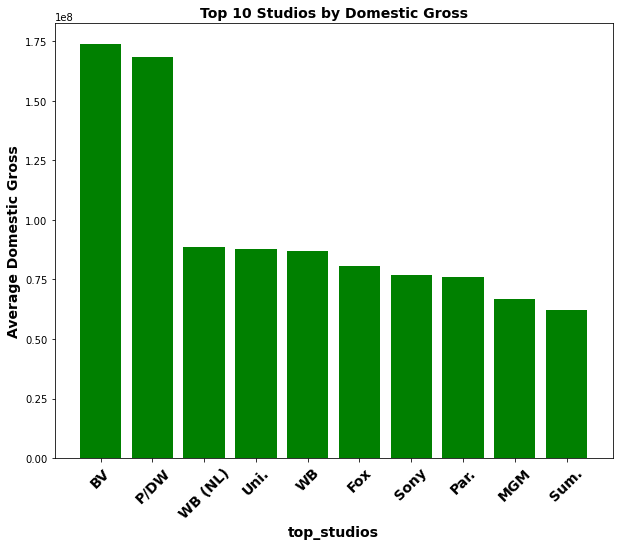

In [299]:
# Create a bar plot of the top 10 studios by domestic gross
plt.bar(top_studios['domestic_gross'].index, top_studios['domestic_gross'].values, color = 'green')
plt.xticks(rotation = 45, fontsize=14, fontweight= 'bold')
plt.xlabel("top_studios", fontsize=14, fontweight='bold')
plt.ylabel("Average Domestic Gross", fontsize =14, fontweight= 'bold')
plt.title("Top 10 Studios by Domestic Gross", fontsize=14, fontweight = 'bold')
plt.gcf().set_size_inches(10,8)
plt.show()

from the bar graph above,one is able to show the the BV studio made the highest domestic gross from the movies that they produced.This shows that the BV studios made the movies thet were really watche and i would like to reccomend th microsoft team to make the same type of movies since they will get more audience

# Data analysis for the cost of production in the movie industry


Inorder to understand the the return on investment that the movies made, we'll have to look at the buget that the movies had and what they made after the movie was made. This will help us to understand the movies that made the most profit and hence will be able to know what type of movies to produce

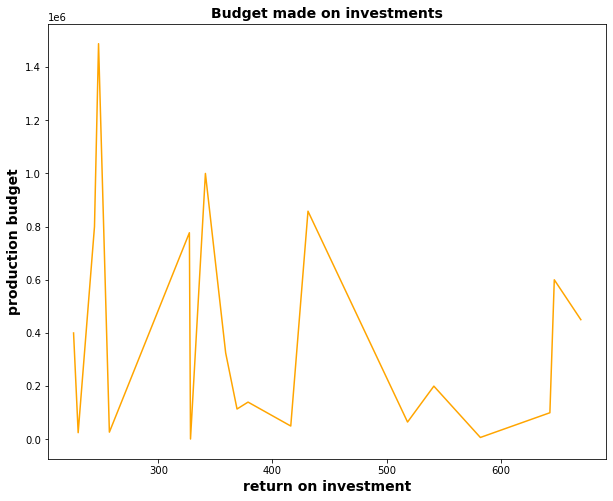

In [315]:
x = movie_budget_sample["return_on_inv"]
y = movie_budget_sample['production_budget'] 
plt.xlabel("return on investment", fontsize=14, fontweight='bold')
plt.ylabel("production budget", fontsize =14, fontweight= 'bold')
plt.title("Budget made on investments", fontsize=14, fontweight = 'bold')
plt.gcf().set_size_inches(10,8)
plt.plot(x,y, color = 'orange');

# competition between different genres in the movie industry

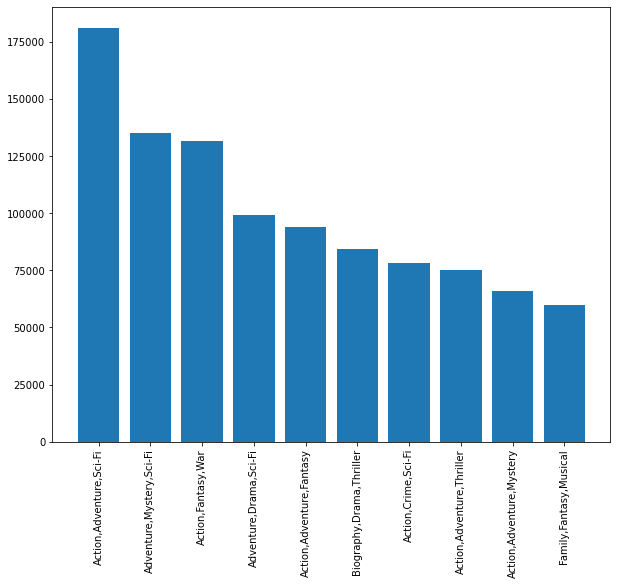

In [325]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=90, fontsize=10)
y = genres_sorted_mean["numvotes"]
plt.bar(y.index, y.values);